In [84]:
import pandas as pd
from itertools import combinations
import numpy as np
from operator import itemgetter

In [68]:
import networkx as nx

In [87]:
import matplotlib.pyplot as plt

In [69]:
def make_graph_by_tag(tag, df):
    
    first_word = []
    second_word = []
    first_tag = []
    second_tag = []
    pmi = []

    for i in range(len(df)):
        if (df['tag'][i].split()[0] in tag and df['tag'][i].split()[1] in tag) and not (len(df['ngram'][i].split()[0])==1 or len(df['ngram'][i].split()[1])==1):
            first_word.append(df['ngram'][i].split()[0])
            second_word.append(df['ngram'][i].split()[1])
            first_tag.append(df['tag'][i].split()[0])
            second_tag.append(df['tag'][i].split()[1])
            pmi.append('%.3f'%float(df['pmi'][i]))
    
    sequences = pd.DataFrame({'first_word':first_word
                         , 'second_word':second_word
                         , 'first_tag':first_tag
                         , 'second_tag':second_tag
                         , 'pmi':pmi})
    
    G = nx.Graph()
    
    for i in range(len(sequences)):
        first_node = '{0}, {1}'.format(sequences['first_word'][i], sequences['first_tag'][i])
        second_node = '{0}, {1}'.format(sequences['second_word'][i], sequences['second_tag'][i])
        if first_node in G.nodes() and not second_node in G.nodes():
            G.add_node(second_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        elif second_node in G.nodes() and not first_node in G.nodes():
            G.add_node(first_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        elif not first_node in G.nodes() and not second_node in G.nodes():
            G.add_node(first_node)
            G.add_node(second_node)
            G.add_edge(first_node, second_node, weight='%.3f'%float(sequences['pmi'][i]))
        else:
            pass
        
    return G

## Lemmas

In [66]:
df_lemmas = pd.read_excel('lemmas_unigrams_bigrams_counts.xlsx', sheet_name='bigrams')

In [70]:
G_lemmas = make_graph_by_tag('SV', df_lemmas)

In [71]:
len(list(G_lemmas.nodes()))

21642

In [73]:
sub_graphs = list(nx.connected_component_subgraphs(G_lemmas))
n = len(sub_graphs)

In [74]:
n

1600

In [75]:
all_clustering = []
for subgraph in sub_graphs:
    all_clustering.append(nx.average_clustering(subgraph))

In [76]:
set(all_clustering)

{0.0}

In [77]:
all_transitivity = []
for subgraph in sub_graphs:
    all_transitivity.append(nx.transitivity(subgraph))

In [78]:
set(all_transitivity)

{0}

In [79]:
all_triangles = []
for subgraph in sub_graphs:
    all_triangles.append(sum(nx.triangles(subgraph).values())/3)

In [80]:
set(all_triangles)

{0.0}

In [81]:
all_assortativity = []
for subgraph in sub_graphs:
    all_assortativity.append(nx.degree_assortativity_coefficient(subgraph))

C:\Users\vasel\Anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [82]:
assortativities = [i for i in list(set(all_assortativity)) if str(i) != 'nan']

In [85]:
np.mean(assortativities)

-0.561068262794659

In [86]:
degrees = sorted(nx.degree(G_lemmas),reverse=True,key=itemgetter(1))

In [93]:
degrees

[('быть, V', 832),
 ('автор, S', 276),
 ('анализ, S', 236),
 ('возможность, S', 170),
 ('мочь, V', 141),
 ('время, S', 136),
 ('спбга, S', 134),
 ('вопрос, S', 96),
 ('акт, S', 82),
 ('александр, S', 81),
 ('работа, S', 80),
 ('власть, S', 78),
 ('группа, S', 77),
 ('исследование, S', 69),
 ('аспект, S', 69),
 ('вид, S', 68),
 ('становиться, V', 65),
 ('год, S', 64),
 ('агент, S', 62),
 ('город, S', 62),
 ('являться, V', 61),
 ('все, S', 60),
 ('актив, S', 59),
 ('банк, S', 58),
 ('идея, S', 58),
 ('государство, S', 55),
 ('влияние, S', 55),
 ('значение, S', 51),
 ('отмечать, V', 51),
 ('активность, S', 51),
 ('деятельность, S', 51),
 ('вариант, S', 51),
 ('большинство, S', 50),
 ('война, S', 49),
 ('выступать, V', 47),
 ('вестник, S', 47),
 ('модель, S', 45),
 ('процесс, S', 44),
 ('акция, S', 43),
 ('история, S', 43),
 ('дело, S', 43),
 ('отношение, S', 42),
 ('проблема, S', 42),
 ('внимание, S', 42),
 ('база, S', 42),
 ('показывать, V', 41),
 ('армия, S', 41),
 ('человек, S', 40),
 

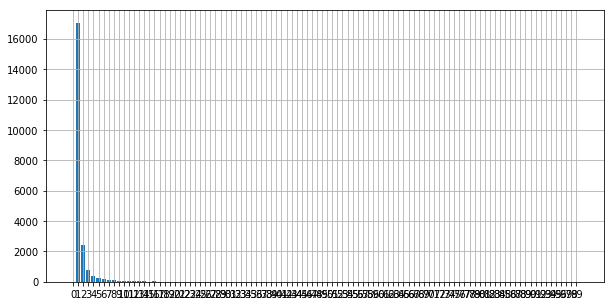

In [89]:
d=nx.degree_histogram(G_lemmas)
c = range(0,100,1)
plt.figure(figsize=(10,5))
plt.bar(c,d[:100],align='center')
plt.xticks(c)
plt.grid(True,which='both')
plt.show()

In [90]:
dcent = nx.degree_centrality(G_lemmas)
centrality = sorted(dcent.items(),reverse=True,key = itemgetter(1))

In [91]:
centrality[:100]

[('быть, V', 0.038445543181923204),
 ('автор, S', 0.01275356961323414),
 ('анализ, S', 0.010905226191026293),
 ('возможность, S', 0.007855459544383346),
 ('мочь, V', 0.0065154105632826585),
 ('время, S', 0.006284367635506678),
 ('спбга, S', 0.006191950464396285),
 ('вопрос, S', 0.004436024213298831),
 ('акт, S', 0.003789104015526085),
 ('александр, S', 0.0037428954299708887),
 ('работа, S', 0.0036966868444156926),
 ('власть, S', 0.0036042696733053),
 ('группа, S', 0.003558061087750104),
 ('исследование, S', 0.003188392403308535),
 ('аспект, S', 0.003188392403308535),
 ('вид, S', 0.003142183817753339),
 ('становиться, V', 0.0030035580610877502),
 ('год, S', 0.002957349475532554),
 ('агент, S', 0.0028649323044221617),
 ('город, S', 0.0028649323044221617),
 ('являться, V', 0.0028187237188669655),
 ('все, S', 0.0027725151333117693),
 ('актив, S', 0.002726306547756573),
 ('банк, S', 0.002680097962201377),
 ('идея, S', 0.002680097962201377),
 ('государство, S', 0.002541472205535789),
 ('влия

## Linguistics

In [160]:
df_ling = pd.read_excel('linguistics_collocation_counts.xlsx', sheet_name='bigrams')

In [161]:
G_ling = make_graph_by_tag('SV', df_ling)

In [162]:
len(list(G_ling.nodes()))

10553

In [163]:
sub_graphs = list(nx.connected_component_subgraphs(G_ling))
n = len(sub_graphs)

In [119]:
n

2108

In [120]:
all_clustering_ling = []
for subgraph in sub_graphs:
    all_clustering_ling.append(nx.average_clustering(subgraph))

In [121]:
set(all_clustering_ling)

{0.0}

In [122]:
all_transitivity_ling = []
for subgraph in sub_graphs:
    all_transitivity_ling.append(nx.transitivity(subgraph))

In [123]:
set(all_transitivity_ling)

{0}

In [124]:
all_triangles_ling = []
for subgraph in sub_graphs:
    all_triangles_ling.append(sum(nx.triangles(subgraph).values())/3)

In [125]:
set(all_triangles_ling)

{0.0}

In [126]:
all_assortativity_ling = []
for subgraph in sub_graphs:
    all_assortativity_ling.append(nx.degree_assortativity_coefficient(subgraph))

C:\Users\vasel\Anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [127]:
assortativities_ling = [i for i in list(set(all_assortativity_ling)) if str(i) != 'nan']

In [128]:
np.mean(assortativities_ling)

-0.5162811144761966

In [129]:
degrees_ling = sorted(nx.degree(G_ling),reverse=True,key=itemgetter(1))

In [130]:
degrees_ling

[('может, V', 74),
 ('было, V', 56),
 ('был, V', 46),
 ('автор, S', 40),
 ('будет, V', 39),
 ('является, V', 35),
 ('была, V', 35),
 ('слова, S', 34),
 ('значения, S', 34),
 ('это, S', 34),
 ('были, V', 31),
 ('могут, V', 31),
 ('анализ, S', 30),
 ('типа, S', 29),
 ('времени, S', 28),
 ('быть, V', 28),
 ('значение, S', 27),
 ('есть, V', 26),
 ('время, S', 26),
 ('речи, S', 26),
 ('авторы, S', 25),
 ('возможность, S', 25),
 ('онегина, S', 24),
 ('позволяет, V', 23),
 ('значений, S', 21),
 ('бо, S', 21),
 ('имеет, V', 21),
 ('глагола, S', 21),
 ('анализа, S', 20),
 ('исследования, S', 19),
 ('конструкции, S', 19),
 ('автора, S', 18),
 ('языка, S', 17),
 ('глагол, S', 17),
 ('слов, S', 17),
 ('возможности, S', 17),
 ('пушкина, S', 17),
 ('перечисления, S', 17),
 ('данных, S', 16),
 ('слово, S', 16),
 ('поэта, S', 16),
 ('используется, V', 16),
 ('внимание, S', 16),
 ('онегин, S', 16),
 ('выражения, S', 16),
 ('евгений, S', 15),
 ('следует, V', 15),
 ('вопрос, S', 15),
 ('текста, S', 14),


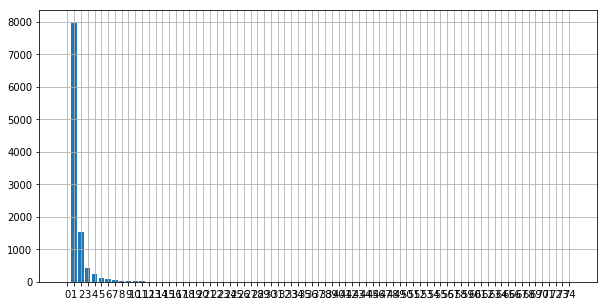

In [131]:
d=nx.degree_histogram(G_ling)
c = range(0,75,1)
plt.figure(figsize=(10,5))
plt.bar(c,d,align='center')
plt.xticks(c)
plt.grid(True,which='both')
plt.show()

In [132]:
dcent = nx.degree_centrality(G_ling)
centrality_ling = sorted(dcent.items(),reverse=True,key = itemgetter(1))

In [133]:
centrality_ling[:100]

[('может, V', 0.007012888551933283),
 ('было, V', 0.00530705079605762),
 ('был, V', 0.004359363153904473),
 ('автор, S', 0.0037907505686125853),
 ('будет, V', 0.0036959818043972707),
 ('является, V', 0.003316906747536012),
 ('была, V', 0.003316906747536012),
 ('слова, S', 0.0032221379833206974),
 ('значения, S', 0.0032221379833206974),
 ('это, S', 0.0032221379833206974),
 ('были, V', 0.0029378316906747536),
 ('могут, V', 0.0029378316906747536),
 ('анализ, S', 0.002843062926459439),
 ('типа, S', 0.0027482941622441245),
 ('времени, S', 0.00265352539802881),
 ('быть, V', 0.00265352539802881),
 ('значение, S', 0.002558756633813495),
 ('есть, V', 0.0024639878695981803),
 ('время, S', 0.0024639878695981803),
 ('речи, S', 0.0024639878695981803),
 ('авторы, S', 0.0023692191053828657),
 ('возможность, S', 0.0023692191053828657),
 ('онегина, S', 0.002274450341167551),
 ('позволяет, V', 0.0021796815769522366),
 ('значений, S', 0.0019901440485216074),
 ('бо, S', 0.0019901440485216074),
 ('имеет, V

## Law

In [164]:
df_law = pd.read_excel('law_collocation_counts.xlsx', sheet_name='bigrams')

In [165]:
G_law = make_graph_by_tag('SV', df_law)

In [166]:
len(list(G_law.nodes()))

13346

In [167]:
sub_graphs = list(nx.connected_component_subgraphs(G_law))
n = len(sub_graphs)

In [168]:
n

1680

In [169]:
all_clustering_law = []
for subgraph in sub_graphs:
    all_clustering_law.append(nx.average_clustering(subgraph))

In [170]:
set(all_clustering_law)

{0.0}

In [171]:
all_transitivity_law = []
for subgraph in sub_graphs:
    all_transitivity_law.append(nx.transitivity(subgraph))

In [172]:
set(all_transitivity_law)

{0}

In [173]:
all_triangles_law = []
for subgraph in sub_graphs:
    all_triangles_law.append(sum(nx.triangles(subgraph).values())/3)

In [174]:
set(all_triangles_law)

{0.0}

In [175]:
all_assortativity_law = []
for subgraph in sub_graphs:
    all_assortativity_law.append(nx.degree_assortativity_coefficient(subgraph))

C:\Users\vasel\Anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [176]:
assortativities_law = [i for i in list(set(all_assortativity_law)) if str(i) != 'nan']

In [177]:
np.mean(assortativities_law)

-0.52212557883746

In [178]:
degrees_law = sorted(nx.degree(G_law),reverse=True,key=itemgetter(1))

In [179]:
degrees_law

[('может, V', 110),
 ('будет, V', 91),
 ('было, V', 84),
 ('возможность, S', 81),
 ('был, V', 76),
 ('могут, V', 73),
 ('государства, S', 64),
 ('права, S', 61),
 ('автор, S', 54),
 ('были, V', 52),
 ('была, V', 47),
 ('рф, S', 46),
 ('ст, S', 44),
 ('является, V', 44),
 ('возможности, S', 44),
 ('государств, S', 44),
 ('время, S', 44),
 ('вестник, S', 40),
 ('будут, V', 36),
 ('власти, S', 35),
 ('россии, S', 34),
 ('внимание, S', 34),
 ('быть, V', 32),
 ('действия, S', 31),
 ('деятельности, S', 30),
 ('право, S', 30),
 ('имеет, V', 29),
 ('договора, S', 29),
 ('это, S', 29),
 ('есть, V', 29),
 ('банка, S', 27),
 ('вопросы, S', 27),
 ('времени, S', 27),
 ('общества, S', 26),
 ('информации, S', 26),
 ('закона, S', 26),
 ('государство, S', 26),
 ('акций, S', 25),
 ('вопрос, S', 25),
 ('организации, S', 24),
 ('анализа, S', 24),
 ('прав, S', 24),
 ('войны, S', 23),
 ('законодательства, S', 23),
 ('берия, S', 23),
 ('авторы, S', 22),
 ('все, S', 22),
 ('действий, S', 22),
 ('анализ, S', 2

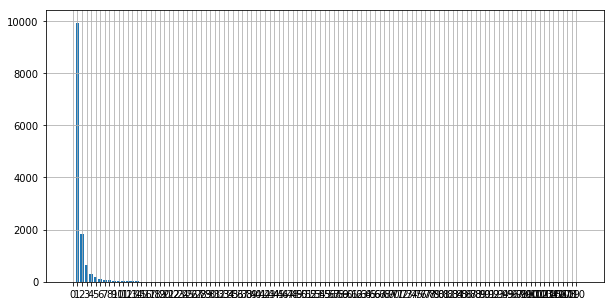

In [183]:
d=nx.degree_histogram(G_law)
c = range(0,111,1)
plt.figure(figsize=(10,5))
plt.bar(c,d,align='center')
plt.xticks(c)
plt.grid(True,which='both')
plt.show()

In [184]:
dcent = nx.degree_centrality(G_law)
centrality_law = sorted(dcent.items(),reverse=True,key = itemgetter(1))

In [185]:
centrality_law[:100]

[('может, V', 0.008242787560884226),
 ('будет, V', 0.006819033345822405),
 ('было, V', 0.006294492319220682),
 ('возможность, S', 0.006069689022105657),
 ('был, V', 0.005695016860247284),
 ('могут, V', 0.005470213563132259),
 ('государства, S', 0.004795803671787186),
 ('права, S', 0.004571000374672162),
 ('автор, S', 0.0040464593480704384),
 ('были, V', 0.0038965904833270885),
 ('была, V', 0.0035219183214687147),
 ('рф, S', 0.00344698388909704),
 ('ст, S', 0.0032971150243536907),
 ('является, V', 0.0032971150243536907),
 ('возможности, S', 0.0032971150243536907),
 ('государств, S', 0.0032971150243536907),
 ('время, S', 0.0032971150243536907),
 ('вестник, S', 0.0029973772948669914),
 ('будут, V', 0.002697639565380292),
 ('власти, S', 0.0026227051330086175),
 ('россии, S', 0.0025477707006369425),
 ('внимание, S', 0.0025477707006369425),
 ('быть, V', 0.002397901835893593),
 ('действия, S', 0.002322967403521918),
 ('деятельности, S', 0.0022480329711502436),
 ('право, S', 0.0022480329711502

## Comparison

In [186]:
degrees_ling_highest = [i[0] for i in degrees_ling[:100]]
degrees_law_highest = [i[0] for i in degrees_law[:100]]

In [190]:
def get_highest_degrees(filename):
    df = pd.read_excel(filename, sheet_name='bigrams')
    G= make_graph_by_tag('SV', df)
    degrees = sorted(nx.degree(G),reverse=True,key=itemgetter(1))
    degrees_highest = [i[0] for i in degrees[:100]]
    return degrees_highest

In [191]:
degrees_ec_highest = get_highest_degrees('economics_collocation_counts.xlsx')
degrees_hist_highest = get_highest_degrees('history_collocation_counts.xlsx')
degrees_soc_highest = get_highest_degrees('sociology_collocation_counts.xlsx')
degrees_pol_highest = get_highest_degrees('politology_collocation_counts.xlsx')
degrees_psy_highest = get_highest_degrees('psychology_and_pedagogics_collocation_counts.xlsx')

In [192]:
l = []
l.append(set(degrees_ec_highest))
l.append(set(degrees_ling_highest))
l.append(set(degrees_law_highest))
l.append(set(degrees_hist_highest))
l.append(set(degrees_soc_highest))
l.append(set(degrees_pol_highest))
l.append(set(degrees_psy_highest))

In [193]:
all_intersection = l[0].intersection(*l[1:])

In [194]:
all_intersection

{'автор, S',
 'анализ, S',
 'будет, V',
 'был, V',
 'была, V',
 'были, V',
 'было, V',
 'возможность, S',
 'вопрос, S',
 'времени, S',
 'время, S',
 'может, V',
 'это, S'}

In [195]:
len(all_intersection)

13

In [187]:
law_ling_intersection = set(degrees_law_highest).intersection(degrees_ling_highest)

In [188]:
law_ling_intersection

{'автор, S',
 'автора, S',
 'авторы, S',
 'анализ, S',
 'анализа, S',
 'будет, V',
 'будут, V',
 'был, V',
 'была, V',
 'были, V',
 'было, V',
 'быть, V',
 'внимание, S',
 'возможности, S',
 'возможность, S',
 'вопрос, S',
 'времени, S',
 'время, S',
 'все, S',
 'данных, S',
 'действия, S',
 'есть, V',
 'жизни, S',
 'имеет, V',
 'могут, V',
 'может, V',
 'позволяет, V',
 'системы, S',
 'следует, V',
 'это, S',
 'является, V',
 'являются, V'}

In [189]:
len(law_ling_intersection)

32

## PMI analysis

In [196]:
import json

with open('node_pmi.json', 'r', encoding='utf-8') as f:
    node_pmi = json.load(f)

In [197]:
node_pmi

{'будет, V': [2073, 335, 886],
 'был, V': [1690, 218, 771],
 'было, V': [812, 48, 274],
 'были, V': [659, 170, 251],
 'может, V': [140, 24, 92],
 'была, V': [9624, 993, 3495],
 'анализ, S': [10120, 255, 2984],
 'время, S': [2073, 335, 886],
 'возможность, S': [273, 41, 100],
 'автор, S': [2633, 355, 1324],
 'авторы, S': [9624, 993, 3495],
 'могут, V': [812, 48, 274],
 'спбгу, S': [0, 0, 0],
 'анализа, S': [9624, 993, 3495],
 'быть, V': [1690, 218, 771],
 'возможности, S': [158, 21, 33],
 'является, V': [1069, 118, 498],
 'будут, V': [2073, 335, 886],
 'власти, S': [325, 71, 206],
 'времени, S': [217, 39, 60],
 'вестник, S': [232, 52, 78],
 'внимание, S': [237, 38, 138],
 'войны, S': [140, 24, 92],
 'государства, S': [9624, 993, 3495],
 'деятельности, S': [48, 10, 29],
 'все, S': [71, 23, 50],
 'есть, V': [88, 18, 42],
 'это, S': [1069, 118, 498],
 'вопрос, S': [2633, 355, 1324]}

In [198]:
all_subs = []
ranked_first = []
first_half = []

for k, v in node_pmi.items():
    all_subs.append(v[0])
    ranked_first.append(v[1])
    first_half.append(v[2])

In [199]:
np.mean(all_subs)

2407.9655172413795

In [200]:
np.mean(ranked_first)

249.68965517241378

In [201]:
np.mean(first_half)

914.7241379310345

In [220]:
np.mean(all_subs) - np.mean(first_half)

1493.241379310345

In [211]:
plt.rcParams['font.size'] = 14

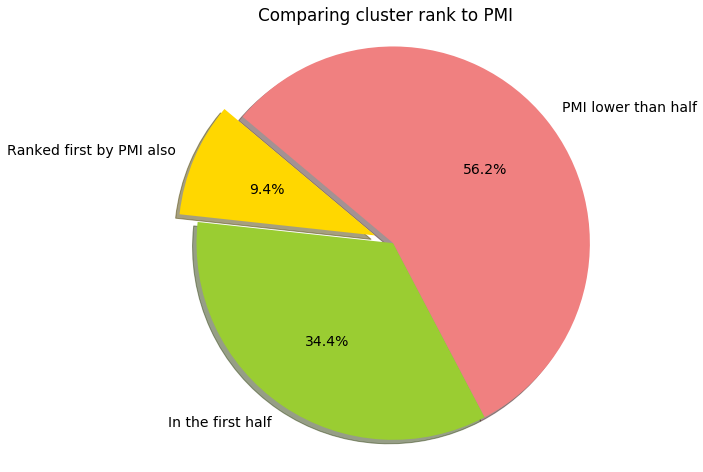

<Figure size 432x288 with 0 Axes>

In [219]:
labels = 'Ranked first by PMI also', 'In the first half', 'PMI lower than half'
sizes = [np.mean(ranked_first), np.mean(first_half), (np.mean(all_subs) - np.mean(first_half))]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

plt.figure(figsize=(8,8))
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Comparing cluster rank to PMI')
plt.axis('equal')
plt.show()
plt.savefig('rank_piechart1.png')